In [13]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [31]:
#define state

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [32]:
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi,2)

    return state

def categorise(state: BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi<18.5:
        state['category'] = "Underweight"
    elif 18.5<=bmi<=24.99:
        state['category'] = 'Normal'
    elif 25<=bmi<=29.99:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'

    return state

In [33]:
#define graph

graph = StateGraph(BMIState)

#add nodes

graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('categorise',categorise)

#add edges

graph.set_entry_point('calculate_bmi')
graph.add_edge('calculate_bmi','categorise')
graph.add_edge('categorise',END)

#compile

app = graph.compile()


In [47]:
#execute

result = app.invoke({
    'weight_kg': 78,
    'height_m':1.77
})

In [48]:
result['category']

'Normal'

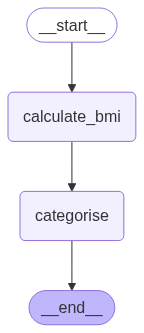

In [49]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())